# Diabetes Prediction

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/diabetes_prediction_dataset.csv')
df.shape

(100000, 9)

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## Data Preprocessing

In [6]:
# Handling missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
# Handling Duplicate values
df.duplicated().sum()

np.int64(3854)

In [8]:
# Add small noise to numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols] + np.random.normal(0, 1e-6, size=df[numeric_cols].shape)

In [9]:
# Handling Duplicate values
df.duplicated().sum()

np.int64(0)

In [10]:
# Handling Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['gender', 'smoking_history']


In [11]:
import pandas as pd

categorical_cols = ['gender', 'smoking_history']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [12]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,79.999999,-1.899284e-06,9.999986e-01,never,25.190000,6.600001,140.000000,-4.368754e-07
1,Female,54.000000,-1.399889e-06,-2.798978e-06,No Info,27.320002,6.600001,79.999999,1.061049e-07
2,Male,27.999999,7.404251e-07,-1.532984e-06,never,27.320000,5.700002,158.000000,-3.788394e-08
3,Female,35.999999,-4.914718e-07,-2.339548e-07,current,23.450000,5.000000,155.000001,7.671819e-07
4,Male,75.999999,1.000002e+00,9.999996e-01,current,20.139999,4.799999,155.000000,3.974201e-07


In [15]:
# scaling :
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_encoded.drop('diabetes', axis=1) 
y = df_encoded['diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Training Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Convert continuous diabetes values to binary (0 or 1)
y_train_binary = (y_train > 0.5).astype(int)
y_test_binary = (y_test > 0.5).astype(int)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train_binary)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]


## Evaluation

Accuracy: 0.97245
ROC AUC: 0.9720091415809422
Confusion Matrix:
 [[18285     7]
 [  544  1164]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



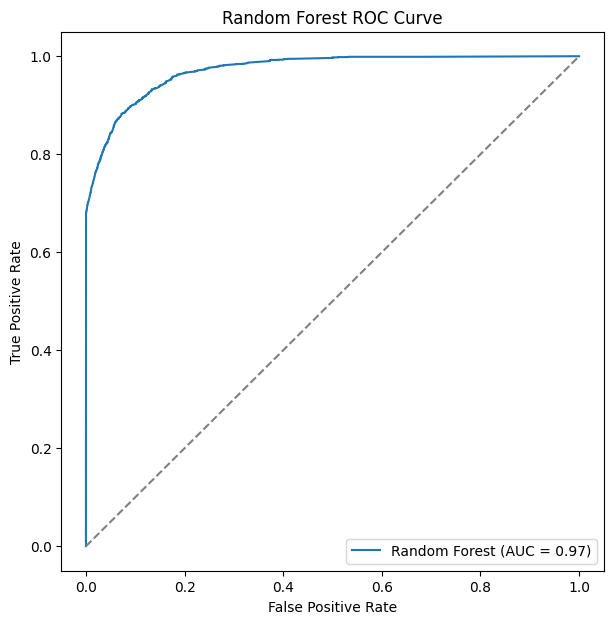

In [19]:
# Evaluation
# use the binary test labels created earlier
print("Accuracy:", accuracy_score(y_test_binary, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test_binary, y_proba_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_rf))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_rf))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_binary, y_proba_rf)
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test_binary, y_proba_rf):.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()


Thanks!